In [86]:
# 超参数
VAULE_Y = '60000305_order_cnt'
VAULE_X = '60000305_amount'
SIGN_LINER = 0.7 #判断是否线性相关的显著性
SIGN_PVALUE = 0.05 #判断pValue的显著性
COLS_ALL = ['date', '60000305_refuelLiters', '站前车流量（汽油）', VAULE_X, VAULE_Y]

import pandas as pd

# 读取excel文件并获取指定列
df_uncleaned = pd.read_csv('Data/竞争站分析-竞争站-单站-32801309.csv', usecols=COLS_ALL,  encoding='GBK')
# 删除包含空值的行
df = df_uncleaned.dropna()


df['305单均升数'] = df['60000305_refuelLiters'] / df['60000305_order_cnt']
VAULE_Y = '305单均升数'

print(df.head())


       date  站前车流量（汽油）  60000305_order_cnt  60000305_refuelLiters  \
0  2023/1/1       3576                 132                3622.58   
1  2023/1/2       3704                 159                4834.58   
2  2023/1/3       4099                 163                4757.30   
3  2023/1/4       3980                 120                3226.61   
4  2023/1/5       4246                 136                3588.63   

   60000305_amount    305单均升数  
0         27349.85  27.443788  
1         36700.28  30.406164  
2         36038.80  29.185890  
3         25005.75  26.888417  
4         27828.22  26.386985  


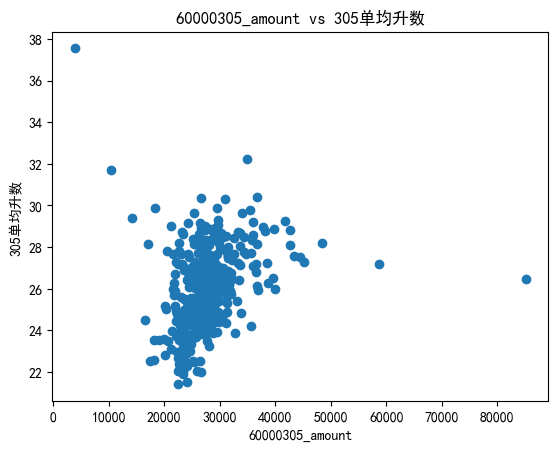

In [87]:
#画出散点图
import matplotlib.pyplot as plt

# 设置字体，确保能正确显示汉字
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体

# 绘制散点图
plt.scatter(df[VAULE_X], df[VAULE_Y])

# 添加标题和坐标轴标签
plt.title(VAULE_X+' vs '+VAULE_Y)
plt.xlabel(VAULE_X)
plt.ylabel(VAULE_Y)

# 显示图形
plt.show()

In [88]:
# 计算相关系数
corr = df[VAULE_X].corr(df[VAULE_Y])
print(f'皮尔逊相关系数（假设两者均为正太分布）为：{corr}')
# 判断线性关系强度
if corr > SIGN_LINER:
    print("具有强正向线性关系, 相关系数接近1")
elif corr < -SIGN_LINER:
    print("具有强负向线性关系, 相关系数接近-1")
else:
    print("线性关系强度不足, 相关系数接近0")

皮尔逊相关系数（假设两者均为正太分布）为：0.22494435059761972
线性关系强度不足, 相关系数接近0


In [89]:
# 拟合出 两者相关性的线性 函数

# 使用最小二乘法拟合数据
column_x = df[VAULE_X]
column_y = df[VAULE_Y]
import numpy as np
coefficients = np.polyfit(column_x, column_y, 1)

# 提取斜率和截距
slope = coefficients[0]
intercept = coefficients[1]

# 打印拟合出的线性函数的参数
print("斜率:", slope)
print("截距:", intercept)


斜率: 7.452472511435062e-05
截距: 24.103590599512287


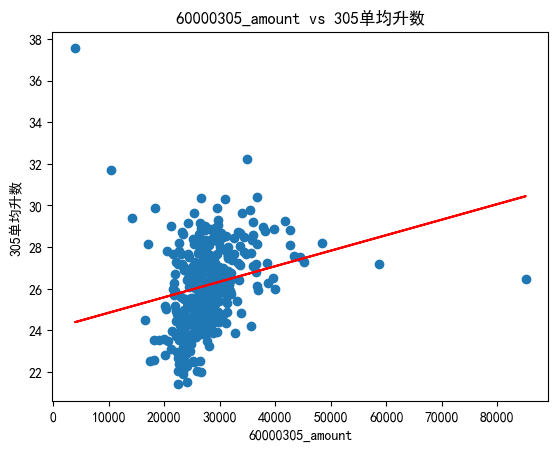

In [90]:
# 在散点图上画出来拟合回归线

# 生成拟合线的数据
x_fit = df[VAULE_X].values.reshape(-1, 1)
y_fit = slope * x_fit + intercept

# 绘制拟合线
plt.plot(x_fit, y_fit, color='red', label='拟合线')

# 绘制散点图
plt.scatter(df[VAULE_X], df[VAULE_Y])

# 添加标题和坐标轴标签
plt.title(VAULE_X+' vs '+VAULE_Y)
plt.xlabel(VAULE_X)
plt.ylabel(VAULE_Y)

# 显示图形
plt.show()